# Дипломная работа по python

In [1]:
# импортируем библиотеки
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

### Задание 1
Загрузите файл HR.csv в pandas dataframe

In [2]:
df = pd.read_csv('HR.csv')

### Описание датасета:

    1.satisfaction_level - Уровень удовлетворенности работой
    2.Last_evaluation - Время с момента последней оценки в годах
    3.number_projects - Количество проектов, выполненных за время работы
    4.average_monthly_hours - Среднее количество часов на рабочем месте в месяц
    5.time_spend_company - Стаж работы в компании в годах
    6.work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
    7.left - уволился ли сотрудник
    8.promotion_last_5years - повышался ли сотрудник за последние пять лет
    9.department - отдел в котором работает сотрудник
    10.salary - относительный уровень зарплаты

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Выводы:
В датасете 14999 значений без пропусков. 
1-2 столбцы - числа с плавающей точкой, 2-7 столбцы - целые числа, 8-9 столбцы - объекты.
Данные пригодны для статистической обработки


### Задание 2
Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).

In [10]:
# Рассчитаем статистики:
# mean - среднее арифметическое
# std - стандартное отклонение
# 25%,50%,75% квантили - значения, ниже которых попадает соответстующий процент значений в выборке
# min/max - минимальное/максимальное значение
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [9]:
# Рассчитаем моду
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


### Выводы:
Средний уровень удовлетворенности в компании довольно высок, но также мы видим большой разброс между сотрудниками.  
Все сотрудники проходили оценку работу в течение последнего года, но повышения в компании большая редкость.
Компания присутствует на рынке не менее 10 лет, но большинстов сотрудников работают в ней менее 4 лет.
23.8% сотрудников уволились.
Довольно высок средний процент несчастных случаев на рабочем месте - 14%

### Задание 3
Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.
Определите две самые скоррелированные и две наименее скоррелированные переменные.

In [5]:
# Создадим датасет только с количественными переменными
df_numeric = df.drop(['department','salary'], axis=1)
df_numeric.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


In [6]:
# Рассчитаем матрицу корреляций
correlation = df_numeric.corr().round(3)
correlation

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000,0.105,-0.143,-0.020,-0.101,0.059,-0.388,0.026
last_evaluation,0.105,1.000,0.349,0.340,0.132,-0.007,0.007,-0.009
number_project,-0.143,0.349,1.000,0.417,0.197,-0.005,0.024,-0.006
average_montly_hours,-0.020,0.340,0.417,1.000,0.128,-0.010,0.071,-0.004
time_spend_company,-0.101,0.132,0.197,0.128,1.000,0.002,0.145,0.067
Work_accident,0.059,-0.007,-0.005,-0.010,0.002,1.000,-0.155,0.039
left,-0.388,0.007,0.024,0.071,0.145,-0.155,1.000,-0.062
promotion_last_5years,0.026,-0.009,-0.006,-0.004,0.067,0.039,-0.062,1.000


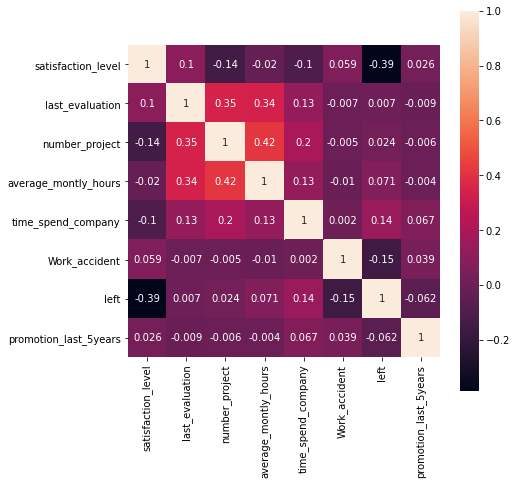

In [7]:
# Визуализируем матрицу с помощью "тепловой карты"
plt.figure(figsize=(7,7))
sns.heatmap(correlation, vmax=1, square=True,annot=True)
plt.show()

### Выводы
Наибольшая положительная корреляция:  
number_project - average_monthly_hours 0.42  
Сотрудники с большим количеством проектов больше времени проводят на работе  
number_project - last_evaluation 0.35  
Сотрудники с большим количеством проектов давно не проходили оценку   
Наибольшая отрицательная корреляция:  
satisfaction_level - left -0.39  
Сотрудники с наименьшим уровнем удовлетворенности чаще покидают компанию  
work_accident - left -0.15  
Сотрудники, с которыми происходили нечаснтые случаи, чаще покидают компанию, но связь не ярко выражена  
Корреляция практически не прослеживается между переменными:  
work_accident - time_spend_company 0.002  
average_monthly_hours - promotion_last_5years -0.004  

### Задание 4
Рассчитайте сколько сотрудников работает в каждом департаменте.

In [8]:
# Общее количество сотрудников в отделах
df['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [9]:
# Количество работающих (не уволившихся) сотрудников
df.loc[df.left == 0]['department'].value_counts()

sales          3126
technical      2023
support        1674
IT              954
product_mng     704
RandD           666
marketing       655
accounting      563
management      539
hr              524
Name: department, dtype: int64

### Выводы:
Больше всего сотрудников в отделе продаж, а также в техническом отделе и отделе поддержки

### Задание 5
Показать распределение сотрудников по зарплатам.

In [10]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

<AxesSubplot:xlabel='salary', ylabel='left'>

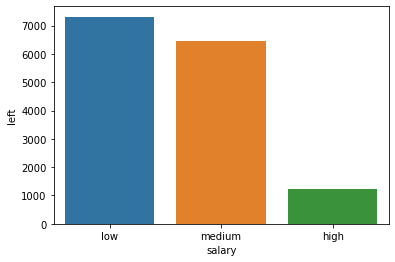

In [11]:
sns.barplot(x ='salary', y ='left', data = df, estimator = len)

### Задание 6
Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [12]:
depts = pd.pivot_table(df, values='satisfaction_level', index='department', columns='salary', aggfunc='count')
depts

salary,high,low,medium
department,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


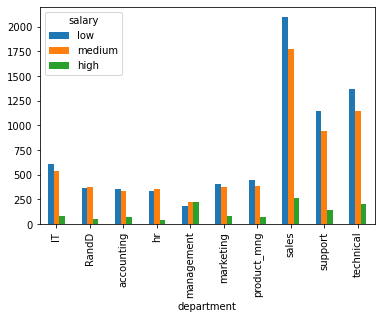

In [13]:
depts[['low','medium','high']].plot(kind='bar');

### Выводы:
Наибольшее количество сотрудников с высокой зарплатой в отделах sales, management, technical и support. Но также в отделах sales, technical и support работает наибольшее количество сотрудников с низкой зарплатой. В других отделах очень мало высокооплачиваемых сотрудников. Только в отделе management количество высокооплачиваемх сотрудников равно количеству сотрудников со средней зарплатой и превосходит число низкооплачиваемых сотрудников. 

### Задание 7
Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

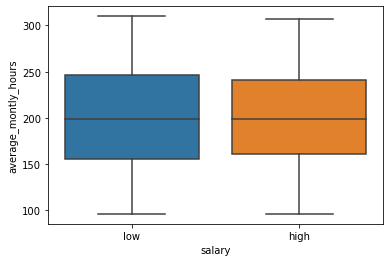

In [74]:
# Построим боксплот посмотреть на разброс данных
ax = sns.boxplot(data = df.query("salary in ('high','low')"), x='salary',y='average_montly_hours')

На основании визуализации складывается впечатление, что гипотеза неверна. Медана и максимальное значение среднего времени, проведенного на работе, у сотрудников с высоким окладом чуть меньше, чем у сотрудников с низким окладом.  

  
Сформулируем нулевую и альтернативную гипотезы и проверим гипотезу статистическим тестом.  
H0 - Сотрудники с высоким окладом проводят на работе не больше времени, чем сотрудники с низким окладом  
H1 - Сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом  
Примем уровень значимости 0.05

In [88]:
# Разделим данные на две выборки - среднее количество часов, проведенных на работе в месяц, для сотрудников с высоким и низким окладом
df_high = df.loc[df.salary == 'high']['average_montly_hours'] 
df_low = df.loc[df.salary == 'low']['average_montly_hours'] 
print(len(df_high))
print(len(df_low))

1237
7316


In [90]:
# Мы имеем дело с выборками с большим количеством данных (>1000), 
# поэтому целесообразно использовать T-тест Стьюдента даже если распределение данных не является нормальным

alpha = 0.05
stat, p = stats.ttest_ind(df_high, df_low, equal_var=False, alternative='greater')
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
	print('Принимаем H0: Сотрудники с высоким окладом проводят на работе не больше времени, чем сотрудники с низким окладом')
else:
	print('Отвергаем H0: Сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом')

Statistics=-0.762, p=0.777
Принимаем H0: Сотрудники с высоким окладом проводят на работе не больше времени, чем сотрудники с низким окладом


### Задание 8
Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):  
● Доля сотрудников с повышением за последние 5 лет  
● Средняя степень удовлетворенности  
● Среднее количество проектов

In [33]:
# Разделим данные на две выборки - уволившихся и не уволившихся сотрудников
df_left = df.loc[df.left == 1]
df_stayed = df.loc[df.left == 0]

In [95]:
# Рассчитаем показатели в сводной таблице
pd.pivot_table(df, values=['promotion_last_5years','satisfaction_level','number_project'], index='left', aggfunc='mean')

,number_project,promotion_last_5years,satisfaction_level
left,,,
0,3.786664,0.026251,0.666810
1,3.855503,0.005321,0.440098


### Выводы:
Средний уровень удовлетворения уволившихся сотрудников (44%) ниже среднего уровня удовлетворенности оставшихся в компании сотрудников (66%).  
Только у 0.5% уволившихся сотрудников были повышения за последние 5 лет, среди оставшихся сотруднико повышали 2.6%.  
Нет заметной разницы в средем количестве проектов, выполненых уволившимися и не уволившимися сотрудниками

### Задание 9
Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборки

In [112]:
# Импортируем библиотеки
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

In [113]:
# Набор факторов:
data = df_numeric.drop('left', axis = 1)
# Целевая переменная:
data_class = df_numeric['left']

In [114]:
# Разделим данные на тестовую и тренировочную выборки в соотношении 30/70
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.30, random_state=42)

In [115]:
#Обучаем модель
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [116]:
#Строим прогноз
y_pred = lda.predict(X_test)

In [117]:
# Результат
new_df = pd.DataFrame(y_test)
new_df['predicted left'] = y_pred
new_df

,left,predicted left
6723,0,0
6473,0,0
4679,0,0
862,1,0
7286,0,0
...,...,...
13388,0,0
10463,0,1
5331,0,0
7499,0,0


In [118]:
#Оценим точность
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7557777777777778

### Вывод
Построенная модель предсказывает, уволится ли сотрудник с точностью 76%